<h2>Imbalanced Data</h2>
Class imblance occurs when the class distribution is skewed towards a certain class. For example in this credit data, 99.7% of the classes are 'Not fraud' and only 0.3% are 'fraud'. This poses challenges in creating machine learning models for the following reasons:<br><br>
<b>classification accuracy: </b> Models trained on unmodified imbalanced data won't perform well in a real situation. Even if the model in this case has say 90% accuracy it is no good because for example a logistic regression wouldn't need to be very accurate to get a 90% accuracy on this data.<br><br>
<b>True Positive, True Negative, False Positive, False negative:</b><br>
True Positive rate and True Negative are both important to keep an eye on when classifying. It's important both perform well in this situation because just getting a high 'True Positive' result won't help us much.<br>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

df_cred = pd.read_csv('/kaggle/input/creditcard.csv',nrows=50000)

#method for later
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [2]:
df_cred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_cred['Class'].value_counts()

0    49852
1      148
Name: Class, dtype: int64

0.99704
0.00296
49852 148


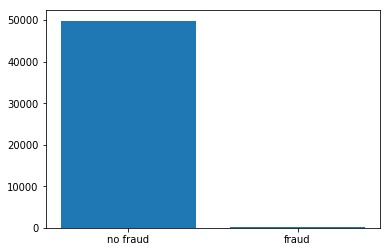

In [4]:
#show classes are extremely imbalanced
no_fraud_count = len(df_cred.loc[df_cred['Class'] == 0])
fraud_count = len(df_cred.loc[df_cred['Class'] == 1])

xcats = ['no fraud','fraud']
ycats = [no_fraud_count,fraud_count]

print(len(df_cred.loc[df_cred['Class'] == 0]) / len(df_cred))
print(len(df_cred.loc[df_cred['Class'] == 1]) / len(df_cred))
print(no_fraud_count,fraud_count)
plt.bar(xcats,ycats)
plt.show()

In [5]:
features = ['Time','V1','V2','V3','V4','V5','V6','V7',
            'V8','V9','V10','V11','V12','V13','V14','V15',
            'V16','V17','V18','V19','V20','V21','V22','V23','V24','V25',
            'V26','V27','V28','Amount']
target = ['Class']
X_train, X_test, y_train, y_test = train_test_split(df_cred[features], df_cred[target],
                                                    test_size=0.2, random_state=0)

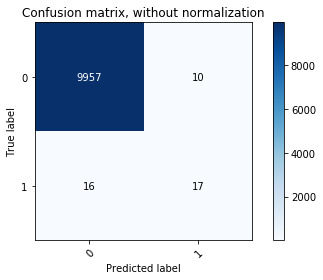

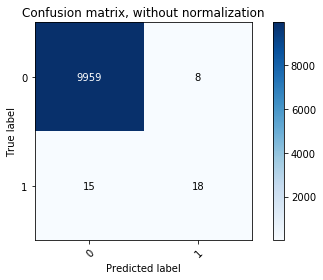

0.9974
0.9977


In [6]:
logistic_model = LogisticRegression(random_state=0,solver='liblinear').fit(X_train,y_train.values.ravel())
logistic_y_pred = logistic_model.predict(X_test)

svm_model = SVC(random_state=0,gamma='scale', kernel='linear',C=0.25).fit(X_train,y_train.values.ravel())
svm_y_pred = svm_model.predict(X_test)

plot_confusion_matrix(y_test,logistic_y_pred,classes=[0,1])
plt.show()
plot_confusion_matrix(y_test,svm_y_pred,classes=[0,1])
plt.show()

print(accuracy_score(y_test,logistic_y_pred))
print(accuracy_score(y_test,svm_y_pred))

We can see the class imbalance has lead to most of the data being (correctly classified) as 0 (True positives), not fraud. Out of the others, logistic regression performed better as it also managed to identify more True Negatives, and fewer False positives/False negatives. The accuracy scores also confirm that svm performed slightly worse out of the box than logistic regression.<br>

These results seem good, but keep in mind 99.7% of the data is classified as not fraud anyway, so in reality it is not terribly accurate. Now we have seen the problem, time to move on to the solution.

<h3> Methods for dealing with Class Imbalance </h3>
Over Sampling: Add copies of instances of the minority class.<br>
Under sampling: Delete instances from the majority class. <br>
SMOTE: Synthetic minority over sampling technique. in short create 'synthetic' extra samples of the minority class. Not good for high dimensional data and as neighbours to the sample are not taken into account, it can just create extra noise in the data<br>

In [7]:
#there are no built in methods to deal with this in scikit learn.
#it would in theory be possible to craft my own ways to improve the data prior to model fitting.